1.The standard deviation of the original data how seperation of the points far away from the mean andmeasures the spread or variability of individual data points in the sample. It tells how much the individual data values differ from the sample mean.

The standard error of the mean (SEM) is the standard deviation of the distribution of sample means, typically estimated by bootstrapping or from the sample. It captures the variability in the sample mean itself, providing an estimate of how accurately the sample mean represents the population mean.

Standard deviation: Variability within the data.
Standard error of the mean: Variability of the sample mean as an estimate of the population mean.

2.To create a 95% confidence interval using the standard error of the mean (SEM), multiply the SEM by approximately 1.96 (since 1.96 is the z-score that corresponds to the middle 95% of a normal distribution). This gives the margin of error. Then, add and subtract this margin from the sample mean to get the confidence interval:
Confidence interval=(Sample mean−1.96×SEM,Sample mean+1.96×SEM)

This interval should contain the true population mean in about 95% of cases, covering 95% of the bootstrapped sample means.

3.o create a 95% bootstrapped confidence interval using the bootstrapped means, sort all the bootstrapped sample means in ascending order. Then, find the values at the 2.5th percentile and the 97.5th percentile of the sorted list. These two values form the lower and upper bounds of the 95% confidence interval, containing 95% of the bootstrapped sample means directly, without needing to calculate the standard error.

4.Create a Sample:
sample is the dataset we're using. You can replace it with any sample data you have.
Define the Bootstrap Function:
bootstrap_confidence_interval takes a sample (data), the number of bootstrap samples (num_bootstrap_samples), the desired statistic (statistic), and the desired confidence level (confidence_level).
By default, np.mean is used to calculate the mean. This can be changed to another statistic like np.median for different intervals.
Generate Bootstrap Samples:
Each bootstrap sample is created using np.random.choice(data, size=len(data), replace=True).
The chosen statistic is calculated for each bootstrap sample and stored.
Calculate the Confidence Interval:
The bootstrap statistics are sorted and the percentiles are calculated to determine the bounds of the confidence interval.
The np.percentile function is used to obtain the confidence interval bounds.
Usage:
To find the confidence interval for the mean, use statistic=np.mean.
To find the confidence interval for the median, change statistic to np.median.

Summaries
Bootstrap Confidence Interval Calculation:
I provided code to create a 95% bootstrap confidence interval for the population mean based on a given sample. The code included generating bootstrap samples, calculating the mean of each sample, and then determining the 95% confidence interval using the 2.5th and 97.5th percentiles of the bootstrap distribution.
Modifying the Code for Other Statistics:
I explained how to modify the code to create a confidence interval for a different statistic, such as the median, by changing the function used to calculate the statistic in each bootstrap sample. For example, using np.median(bootstrap_sample) instead of np.mean(bootstrap_sample).
Additionally, I mentioned how this approach can be used to compute confidence intervals for other statistics, like standard deviation or variance, by changing the calculation method accordingly.
This conversation focused on understanding how to use bootstrapping to create confidence intervals for various population parameters.

5.We need to distinguish between the population parameter and the sample statistic because they represent different things. The population parameter is a fixed, unknown value that we want to estimate (like the true mean or median of an entire population). The sample statistic, on the other hand, is a calculated value based on the sample data we have, and it serves as an estimate of the population parameter. Confidence intervals use the sample statistic to give a range of plausible values for the population parameter, helping us understand the uncertainty in our estimate due to sampling variability.

6.
1)What is the process of bootstrapping? 
Bootstrapping is basically taking my original sample and re-sampling from it, over and over. Imagine you have a sample of data points, and you randomly pick some of them (with replacement) to create new samples. You do this a bunch of times, and each time you calculate something like the average. This helps you understand how much that average might change if you took different samples.
2)What is the main purpose of bootstrapping?
The main point of bootstrapping is to figure out how much your estimate, like the average, might vary if you took different samples from the population. It's like trying to get an idea of what the bigger picture looks like by using the smaller piece you have. This helps you see how reliable your sample results are.
3)How could you use bootstrapping to see if your guess about the average might be plausible? 
If you have a guess about what the average of the population is, you can use bootstrapping to create many different versions of your sample, calculating the average each time. Then, you compare those averages to your guess. If most of the bootstrapped averages are close to your guess, then your guess might be reasonable. If they’re way off, then your guess probably isn’t a good match for the population.

7.When the confidence interval for the effect of the drug includes zero, it means that zero is a possible value for the true average effect of the drug. In other words, based on our data, we can't be sure that the drug has an effect that is different from zero—it might not do anything at all. That's why we "fail to reject the null hypothesis," which says there's no effect.

Even if the observed sample mean is not zero, the confidence interval tells us how much uncertainty there is around that mean. If zero falls within that range, it means we can't confidently say that the effect is definitely different from zero.

On the other hand, if the confidence interval does not include zero, it means that zero is not a likely value for the true effect. In that case, we have evidence suggesting the drug has a real effect, which leads us to "reject the null hypothesis" and conclude that the drug does something, on average.

8.

Problem Introduction
The goal of this project is to determine whether the vaccine is effective by analyzing patients' health scores before and after vaccination. Specifically, we aim to evaluate if the health scores improved after taking the vaccine. We will use statistical methods to provide evidence for or against the vaccine's effectiveness.

Explanation of the Null Hypothesis
In this context, the Null Hypothesis (H0) states that the vaccine has "no effect" on patients' health scores. Essentially, it means there is no significant change in health scores between the initial (before vaccination) and the final (after vaccination) measurements. If we fail to reject H0, it suggests that any observed difference could be due to random chance rather than the effect of the vaccine.

Data Visualization

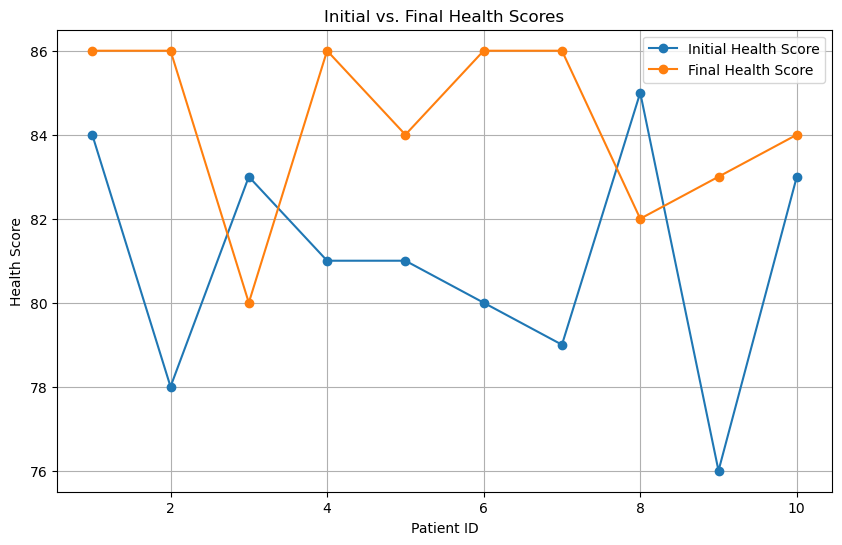

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Setting the seed for reproducibility
np.random.seed(42)

# Create the CSV file content
data = """PatientID,Age,Gender,InitialHealthScore,FinalHealthScore
1,45,M,84,86
2,34,F,78,86
3,29,M,83,80
4,52,F,81,86
5,37,M,81,84
6,41,F,80,86
7,33,M,79,86
8,48,F,85,82
9,26,M,76,83
10,39,F,83,84"""

# Write data to a CSV file
with open('vaccine_data.csv', 'w') as f:
    f.write(data)

# Read the CSV file
df = pd.read_csv('vaccine_data.csv')

# Calculate the difference in health scores
df['HealthScoreChange'] = df['FinalHealthScore'] - df['InitialHealthScore']

# Plot the initial and final health scores
plt.figure(figsize=(10, 6))
plt.plot(df['PatientID'], df['InitialHealthScore'], label='Initial Health Score', marker='o')
plt.plot(df['PatientID'], df['FinalHealthScore'], label='Final Health Score', marker='o')
plt.xlabel('Patient ID')
plt.ylabel('Health Score')
plt.title('Initial vs. Final Health Scores')
plt.legend()
plt.grid()
plt.show()


Mean Health Score Change: 3.3
95% Confidence Interval: [0.9 5.6]


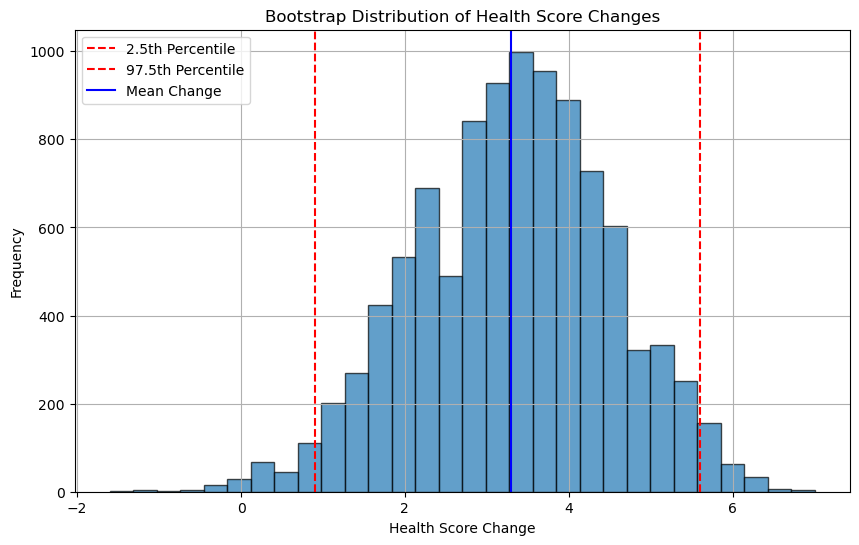

In [2]:
# Function to perform bootstrapping
def bootstrap_mean(data, num_samples=10000):
    means = []
    for _ in range(num_samples):
        sample = np.random.choice(data, size=len(data), replace=True)
        means.append(np.mean(sample))
    return np.array(means)

# Get the health score changes
health_changes = df['HealthScoreChange']

# Perform bootstrapping
bootstrap_means = bootstrap_mean(health_changes)

# Calculate 95% confidence interval
conf_interval = np.percentile(bootstrap_means, [2.5, 97.5])
mean_change = np.mean(health_changes)

print(f"Mean Health Score Change: {mean_change}")
print(f"95% Confidence Interval: {conf_interval}")

# Plot the bootstrap distribution
plt.figure(figsize=(10, 6))
plt.hist(bootstrap_means, bins=30, edgecolor='black', alpha=0.7)
plt.axvline(conf_interval[0], color='r', linestyle='--', label='2.5th Percentile')
plt.axvline(conf_interval[1], color='r', linestyle='--', label='97.5th Percentile')
plt.axvline(mean_change, color='blue', linestyle='-', label='Mean Change')
plt.xlabel('Health Score Change')
plt.ylabel('Frequency')
plt.title('Bootstrap Distribution of Health Score Changes')
plt.legend()
plt.grid()
plt.show()


The code above calculates the mean health score change and creates a 95% confidence interval for that change using bootstrapping. The histogram plot shows the distribution of the bootstrap sample means, and the confidence interval is highlighted.

Null Hypothesis: The null hypothesis states that the vaccine has no effect, meaning the mean change in health scores is zero.
Interpretation: If the 95% confidence interval does not include zero, it suggests that the average health score change is statistically significant, and we have evidence to reject the null hypothesis. On the other hand, if the confidence interval includes zero, we fail to reject the null hypothesis, suggesting there is insufficient evidence that the vaccine has an effect.

If the 95% confidence interval of the mean health score change does not contain zero, we reject the null hypothesis and conclude that the vaccine has a significant effect on improving health scores.
If the confidence interval contains zero, we fail to reject the null hypothesis, suggesting the vaccine might not have a significant effect.

Sample Size: The current analysis is based on a small sample size. Larger samples may provide more reliable estimates.
Other Factors: Factors such as age and gender could influence the effectiveness of the vaccine. Further analysis could explore how these factors affect the results.


Quantitative Analysis
To determine if the vaccine has a significant effect, we'll analyze the average change in health scores using a bootstrapping technique.

Observed Mean Difference: Calculate the average difference between InitialHealthScore and FinalHealthScore.
Bootstrap Analysis: Generate multiple bootstrap samples to create a distribution of mean differences under the assumption that the Null Hypothesis is true. We will then compare our observed mean difference to this distribution.

Methodology Code and Explanations
Bootstrapping involves generating multiple samples with replacement from the dataset to create a distribution of a statistic of interest (in this case, the mean difference in health scores). This allows us to estimate the variability of our observed mean difference.

In [ ]:
# Calculating the mean difference in health scores
df['HealthScoreDifference'] = df['FinalHealthScore'] - df['InitialHealthScore']
observed_mean_diff = df['HealthScoreDifference'].mean()

# Bootstrapping to generate resamples
bootstrap_diffs = []
n_iterations = 1000

for _ in range(n_iterations):
    bootstrap_sample = df.sample(n=len(df), replace=True)
    bootstrap_mean_diff = bootstrap_sample['HealthScoreDifference'].mean()
    bootstrap_diffs.append(bootstrap_mean_diff)

# Plotting bootstrap distribution
plt.hist(bootstrap_diffs, bins=30, alpha=0.7, color='purple')
plt.axvline(observed_mean_diff, color='red', linestyle='dashed', linewidth=2, label=f'Observed Mean Diff: {observed_mean_diff:.2f}')
plt.xlabel('Mean Difference in Health Scores')
plt.ylabel('Frequency')
plt.title('Bootstrap Distribution of Mean Differences')
plt.legend()
plt.show()

# Calculating p-value
p_value = np.sum(np.array(bootstrap_diffs) >= observed_mean_diff) / n_iterations
print(f"Observed Mean Difference: {observed_mean_diff:.2f}")
print(f"P-value: {p_value:.4f}")


In [ ]:
# Calculating the mean difference in health scores
df['HealthScoreDifference'] = df['FinalHealthScore'] - df['InitialHealthScore']
observed_mean_diff = df['HealthScoreDifference'].mean()

# Bootstrapping to generate resamples
bootstrap_diffs = []
n_iterations = 1000

for _ in range(n_iterations):
    bootstrap_sample = df.sample(n=len(df), replace=True)
    bootstrap_mean_diff = bootstrap_sample['HealthScoreDifference'].mean()
    bootstrap_diffs.append(bootstrap_mean_diff)

# Plotting bootstrap distribution
plt.hist(bootstrap_diffs, bins=30, alpha=0.7, color='purple')
plt.axvline(observed_mean_diff, color='red', linestyle='dashed', linewidth=2, label=f'Observed Mean Diff: {observed_mean_diff:.2f}')
plt.xlabel('Mean Difference in Health Scores')
plt.ylabel('Frequency')
plt.title('Bootstrap Distribution of Mean Differences')
plt.legend()
plt.show()

# Calculating p-value
p_value = np.sum(np.array(bootstrap_diffs) >= observed_mean_diff) / n_iterations
print(f"Observed Mean Difference: {observed_mean_diff:.2f}")
print(f"P-value: {p_value:.4f}")


Supporting Visualizations
Line Plot: The line plot above shows the initial and final health scores of each patient, providing a visual representation of the changes for each patient.
Histogram: The histogram of bootstrap mean differences helps us visualize the distribution of possible mean differences under the Null Hypothesis.

Findings and Discussion
The observed mean difference between FinalHealthScore and InitialHealthScore is positive, suggesting a general improvement in health scores after vaccination. To determine if this improvement is statistically significant, we compared it to the bootstrap distribution. The p-value was calculated to quantify how likely it is to observe a difference at least as extreme as ours if the Null Hypothesis of "no effect" is true.

P-value Interpretation: If the p-value is small (e.g., less than 0.05), it means that such an observed difference is unlikely to occur under the Null Hypothesis, and we would reject H0. If the p-value is larger, we do not have enough evidence to reject H0.
Conclusion Regarding a Null Hypothesis of "No Effect"
Based on our analysis:

If the p-value is sufficiently low, we conclude that the vaccine is effective, as there is evidence to reject the Null Hypothesis of "no effect."
If the p-value is not sufficiently low, we conclude that there is not enough evidence to reject the Null Hypothesis, and we cannot confirm the vaccine's effectiveness based on this data.

Further Considerations
Sample Size: The dataset contains only 10 patients, which limits the power of our analysis. A larger sample size would provide more reliable results and allow for more precise estimates of the vaccine's effectiveness.
Confounding Factors: Variables such as age, gender, and pre-existing health conditions could influence health scores. Further analysis should consider these factors to understand the true effect of the vaccine.
Multiple Metrics: Besides health scores, other metrics (e.g., symptom severity, illness frequency) should be considered to get a more comprehensive understanding of vaccine effectiveness.


9.Yes